In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("Ctenohystrica_out_iqtree_v2_HKY_G5.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n211         1.6908 ( 1.5904,  1.8593) ( 1.5792,  1.8355)  0.2563 (Jnode 418)\n',
 't_n212         0.6072 ( 0.5961,  0.6191) ( 0.5959,  0.6186)  0.0227 (Jnode 417)\n',
 't_n213         0.5444 ( 0.4995,  0.5799) ( 0.5015,  0.5809)  0.0794 (Jnode 416)\n',
 't_n214         0.4209 ( 0.4033,  0.4388) ( 0.4028,  0.4382)  0.0354 (Jnode 415)\n',
 't_n215         0.3765 ( 0.3601,  0.3932) ( 0.3600,  0.3930)  0.0330 (Jnode 414)\n',
 't_n216         0.3700 ( 0.3535,  0.3865) ( 0.3537,  0.3866)  0.0329 (Jnode 413)\n',
 't_n217         0.3414 ( 0.3238,  0.3583) ( 0.3236,  0.3581)  0.0345 (Jnode 412)\n',
 't_n218         0.2445 ( 0.2180,  0.2688) ( 0.2185,  0.2691)  0.0507 (Jnode 411)\n',
 't_n219         0.2373 ( 0.2111,  0.2610) ( 0.2104,  0.2599)  0.0495 (Jnode 410)\n',
 't_n220         0.1919 ( 0.1658,  0.2174) ( 0.1658,  0.2173)  0.0515 (Jnode 409)\n',
 't_n221         0.1889 ( 0.1632,  0.2137) ( 0.1611,  0.2114)  0.0503 (Jnode 408)\n',
 't_n222         0.1846 ( 0.1589,  0.2090) ( 0.1581,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n211',
 't_n212',
 't_n213',
 't_n214',
 't_n215',
 't_n216',
 't_n217',
 't_n218',
 't_n219',
 't_n220',
 't_n221',
 't_n222',
 't_n223',
 't_n224',
 't_n225',
 't_n226',
 't_n227',
 't_n228',
 't_n229',
 't_n230',
 't_n231',
 't_n232',
 't_n233',
 't_n234',
 't_n235',
 't_n236',
 't_n237',
 't_n238',
 't_n239',
 't_n240',
 't_n241',
 't_n242',
 't_n243',
 't_n244',
 't_n245',
 't_n246',
 't_n247',
 't_n248',
 't_n249',
 't_n250',
 't_n251',
 't_n252',
 't_n253',
 't_n254',
 't_n255',
 't_n256',
 't_n257',
 't_n258',
 't_n259',
 't_n260',
 't_n261',
 't_n262',
 't_n263',
 't_n264',
 't_n265',
 't_n266',
 't_n267',
 't_n268',
 't_n269',
 't_n270',
 't_n271',
 't_n272',
 't_n273',
 't_n274',
 't_n275',
 't_n276',
 't_n277',
 't_n278',
 't_n279',
 't_n280',
 't_n281',
 't_n282',
 't_n283',
 't_n284',
 't_n285',
 't_n286',
 't_n287',
 't_n288',
 't_n289',
 't_n290',
 't_n291',
 't_n292',
 't_n293',
 't_n294',
 't_n295',
 't_n296',
 't_n297',
 't_n298',
 't_n299',
 't_n300',
 't_n301',

In [6]:
posterior_mean_iqtree

[1.6908,
 0.6072,
 0.5444,
 0.4209,
 0.3765,
 0.37,
 0.3414,
 0.2445,
 0.2373,
 0.1919,
 0.1889,
 0.1846,
 0.1346,
 0.0978,
 0.0567,
 0.0433,
 0.0303,
 0.0197,
 0.0294,
 0.1746,
 0.1366,
 0.1284,
 0.0817,
 0.053,
 0.0347,
 0.0745,
 0.0486,
 0.0045,
 0.0726,
 0.1777,
 0.1708,
 0.1641,
 0.1565,
 0.1416,
 0.0596,
 0.1283,
 0.1233,
 0.0292,
 0.1243,
 0.1198,
 0.1095,
 0.0647,
 0.0615,
 0.0539,
 0.0503,
 0.0372,
 0.0304,
 0.0126,
 0.0004,
 0.0225,
 0.0104,
 0.0599,
 0.1043,
 0.0937,
 0.0418,
 0.1128,
 0.07,
 0.0615,
 0.0548,
 0.0494,
 0.0052,
 0.0182,
 0.1696,
 0.0609,
 0.0075,
 0.0434,
 0.0294,
 0.0231,
 0.0195,
 0.1568,
 0.142,
 0.101,
 0.0754,
 0.0677,
 0.0563,
 0.0326,
 0.0596,
 0.0499,
 0.2127,
 0.1131,
 0.0722,
 0.0711,
 0.0656,
 0.0513,
 0.0064,
 0.0361,
 0.0101,
 0.0068,
 0.0484,
 0.0104,
 0.008,
 0.0689,
 0.059,
 0.0549,
 0.0422,
 0.0277,
 0.0178,
 0.0588,
 0.0492,
 0.016,
 0.028,
 0.0233,
 0.0148,
 0.0084,
 0.0421,
 0.0359,
 0.0232,
 0.0144,
 0.0167,
 0.0266,
 0.0683,
 0.0453,
 0.

In [7]:
lower_ci_iqtree

[1.5904,
 0.5961,
 0.4995,
 0.4033,
 0.3601,
 0.3535,
 0.3238,
 0.218,
 0.2111,
 0.1658,
 0.1632,
 0.1589,
 0.1075,
 0.0705,
 0.0365,
 0.0257,
 0.0171,
 0.01,
 0.0164,
 0.149,
 0.1117,
 0.1035,
 0.0594,
 0.0267,
 0.02,
 0.054,
 0.0309,
 0.0016,
 0.0497,
 0.1532,
 0.1472,
 0.1412,
 0.1346,
 0.1192,
 0.036,
 0.106,
 0.101,
 0.017,
 0.1032,
 0.0995,
 0.0897,
 0.0503,
 0.0476,
 0.0409,
 0.038,
 0.0262,
 0.0204,
 0.0068,
 0.0,
 0.0142,
 0.0055,
 0.0419,
 0.0741,
 0.0644,
 0.0241,
 0.0816,
 0.0494,
 0.0426,
 0.0347,
 0.0305,
 0.0005,
 0.0066,
 0.1447,
 0.0378,
 0.0023,
 0.0241,
 0.0154,
 0.0118,
 0.0095,
 0.1339,
 0.117,
 0.0789,
 0.0577,
 0.0522,
 0.0398,
 0.0219,
 0.0443,
 0.0328,
 0.1878,
 0.0952,
 0.0594,
 0.0584,
 0.0528,
 0.0381,
 0.0017,
 0.0246,
 0.004,
 0.0021,
 0.0356,
 0.0053,
 0.0036,
 0.0563,
 0.0474,
 0.0423,
 0.0312,
 0.0185,
 0.0105,
 0.0458,
 0.0358,
 0.0079,
 0.0181,
 0.0144,
 0.0078,
 0.0035,
 0.0297,
 0.0248,
 0.0135,
 0.0067,
 0.0082,
 0.0159,
 0.0536,
 0.0301,
 0.0015,


In [8]:
upper_ci_iqtree

[1.8593,
 0.6191,
 0.5799,
 0.4388,
 0.3932,
 0.3865,
 0.3583,
 0.2688,
 0.261,
 0.2174,
 0.2137,
 0.209,
 0.1609,
 0.1225,
 0.0778,
 0.0631,
 0.0459,
 0.0317,
 0.0467,
 0.2001,
 0.1635,
 0.1559,
 0.1095,
 0.0802,
 0.0561,
 0.1004,
 0.0696,
 0.0094,
 0.1036,
 0.2031,
 0.1966,
 0.1902,
 0.1829,
 0.1687,
 0.0862,
 0.1555,
 0.1508,
 0.0457,
 0.1496,
 0.1446,
 0.1332,
 0.0814,
 0.0778,
 0.0695,
 0.0655,
 0.0507,
 0.0427,
 0.0205,
 0.0014,
 0.0335,
 0.0171,
 0.0799,
 0.1334,
 0.1239,
 0.0633,
 0.1441,
 0.0945,
 0.0833,
 0.0771,
 0.0711,
 0.0158,
 0.0355,
 0.1965,
 0.0866,
 0.0161,
 0.0667,
 0.0481,
 0.0389,
 0.0339,
 0.182,
 0.1685,
 0.1258,
 0.1012,
 0.0864,
 0.0753,
 0.0456,
 0.0777,
 0.0685,
 0.2371,
 0.1352,
 0.0856,
 0.0845,
 0.0799,
 0.0665,
 0.014,
 0.0498,
 0.0194,
 0.0142,
 0.0628,
 0.0177,
 0.0145,
 0.0826,
 0.0722,
 0.0684,
 0.0545,
 0.0389,
 0.0269,
 0.0728,
 0.0642,
 0.0273,
 0.0403,
 0.0343,
 0.024,
 0.0155,
 0.0565,
 0.0494,
 0.0363,
 0.0256,
 0.0286,
 0.0397,
 0.083,
 0.0616

In [9]:
file_mcmctree = open("ctenohystrica_out_baseml_HKY_G5.txt", "r")
lines1 = file_mcmctree.readlines()
file_mcmctree.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

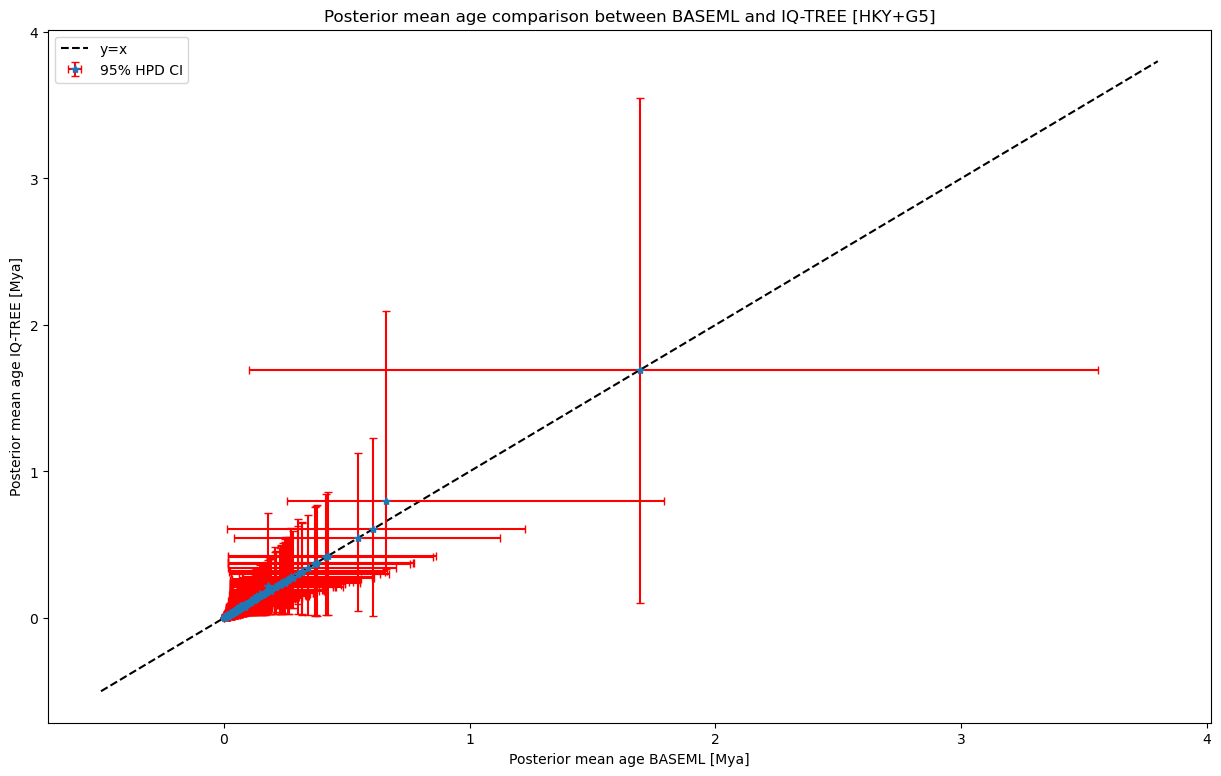

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot([-0.5,3.8], 
        [-0.5, 3.8], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age BASEML [Mya]')
ax.set_ylabel('Posterior mean age IQ-TREE [Mya]')
ax.set_title('Posterior mean age comparison between BASEML and IQ-TREE [HKY+G5]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('/home/piyumal/PHD/phylogenetics/code/TreeMatching2/date_testing/Ctenohystrica/Ctenohystrica_posterior_mean_age_comparison_HKY_G5_v2.png')

In [11]:
posterior_mean_baseml

[1.6911,
 0.607,
 0.5447,
 0.4218,
 0.3777,
 0.3712,
 0.3418,
 0.2421,
 0.2339,
 0.1887,
 0.1858,
 0.1811,
 0.1296,
 0.0915,
 0.0515,
 0.0379,
 0.025,
 0.0156,
 0.0265,
 0.1708,
 0.1305,
 0.1224,
 0.0746,
 0.0498,
 0.0279,
 0.084,
 0.0497,
 0.0046,
 0.0677,
 0.1745,
 0.1678,
 0.1613,
 0.1544,
 0.1405,
 0.0531,
 0.1268,
 0.1225,
 0.0274,
 0.1215,
 0.117,
 0.107,
 0.0633,
 0.0599,
 0.0524,
 0.0487,
 0.0368,
 0.0305,
 0.0124,
 0.0003,
 0.0203,
 0.009,
 0.0567,
 0.1015,
 0.0932,
 0.0399,
 0.1104,
 0.0674,
 0.0589,
 0.05,
 0.0448,
 0.0045,
 0.0159,
 0.1673,
 0.0564,
 0.0059,
 0.0386,
 0.0275,
 0.0211,
 0.0179,
 0.1531,
 0.1381,
 0.0972,
 0.0727,
 0.0644,
 0.0534,
 0.0304,
 0.0564,
 0.0473,
 0.2096,
 0.1112,
 0.0697,
 0.0688,
 0.0638,
 0.0509,
 0.0053,
 0.0367,
 0.011,
 0.0074,
 0.0463,
 0.0105,
 0.0079,
 0.0671,
 0.0571,
 0.0516,
 0.0399,
 0.0266,
 0.0156,
 0.0545,
 0.0473,
 0.0154,
 0.0274,
 0.0225,
 0.015,
 0.0088,
 0.0398,
 0.0335,
 0.0218,
 0.0145,
 0.0144,
 0.0246,
 0.0669,
 0.0444,
 0

In [12]:
posterior_mean_iqtree

[1.6908,
 0.6072,
 0.5444,
 0.4209,
 0.3765,
 0.37,
 0.3414,
 0.2445,
 0.2373,
 0.1919,
 0.1889,
 0.1846,
 0.1346,
 0.0978,
 0.0567,
 0.0433,
 0.0303,
 0.0197,
 0.0294,
 0.1746,
 0.1366,
 0.1284,
 0.0817,
 0.053,
 0.0347,
 0.0745,
 0.0486,
 0.0045,
 0.0726,
 0.1777,
 0.1708,
 0.1641,
 0.1565,
 0.1416,
 0.0596,
 0.1283,
 0.1233,
 0.0292,
 0.1243,
 0.1198,
 0.1095,
 0.0647,
 0.0615,
 0.0539,
 0.0503,
 0.0372,
 0.0304,
 0.0126,
 0.0004,
 0.0225,
 0.0104,
 0.0599,
 0.1043,
 0.0937,
 0.0418,
 0.1128,
 0.07,
 0.0615,
 0.0548,
 0.0494,
 0.0052,
 0.0182,
 0.1696,
 0.0609,
 0.0075,
 0.0434,
 0.0294,
 0.0231,
 0.0195,
 0.1568,
 0.142,
 0.101,
 0.0754,
 0.0677,
 0.0563,
 0.0326,
 0.0596,
 0.0499,
 0.2127,
 0.1131,
 0.0722,
 0.0711,
 0.0656,
 0.0513,
 0.0064,
 0.0361,
 0.0101,
 0.0068,
 0.0484,
 0.0104,
 0.008,
 0.0689,
 0.059,
 0.0549,
 0.0422,
 0.0277,
 0.0178,
 0.0588,
 0.0492,
 0.016,
 0.028,
 0.0233,
 0.0148,
 0.0084,
 0.0421,
 0.0359,
 0.0232,
 0.0144,
 0.0167,
 0.0266,
 0.0683,
 0.0453,
 0.

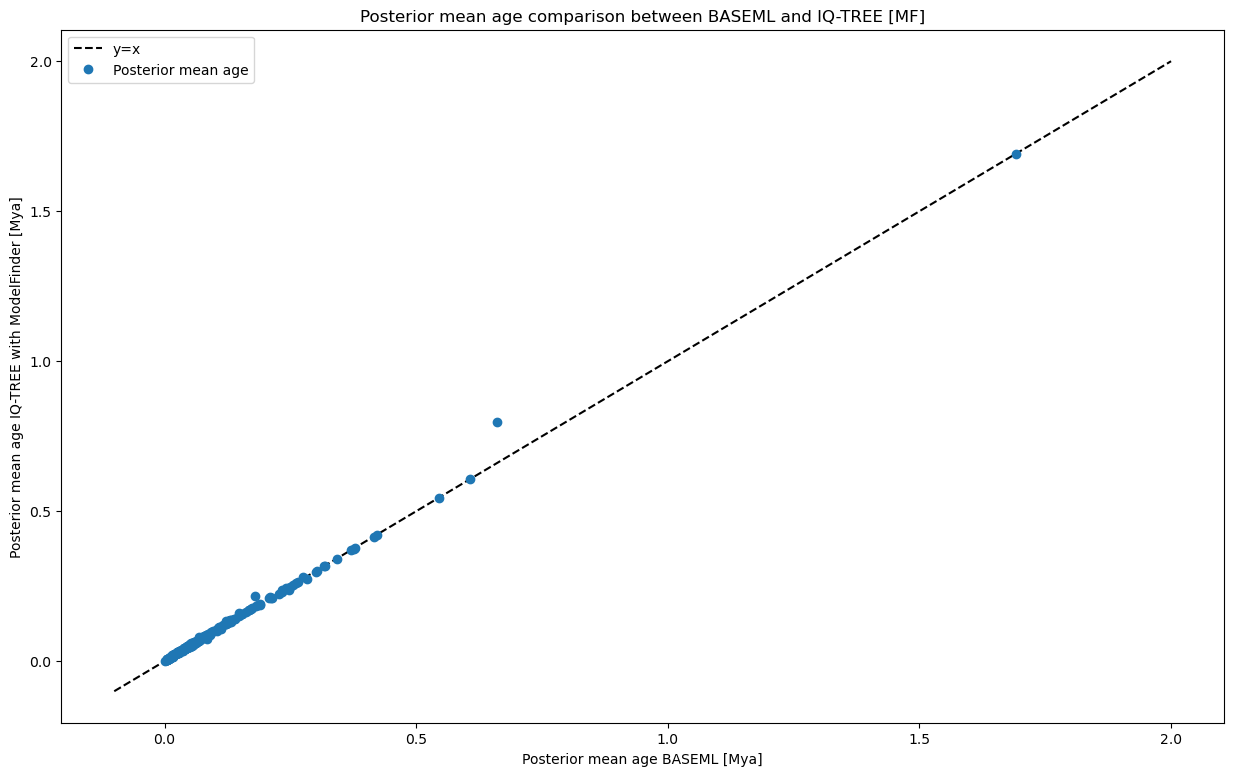

In [13]:
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot([-0.1,2.0], 
        [-0.1, 2.0], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age BASEML [Mya]')
ax.set_ylabel('Posterior mean age IQ-TREE with ModelFinder [Mya]')
ax.set_title('Posterior mean age comparison between BASEML and IQ-TREE [MF]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('/home/piyumal/PHD/phylogenetics/code/TreeMatching2/date_testing/Ctenohystrica/Ctenohystrica_posterior_mean_age_comparison_HKY_G5_scatter_v2.png')